In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('Data/911-Calls.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
df.index

RangeIndex(start=0, stop=99492, step=1)

In [6]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [7]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [8]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [9]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [10]:
df['title'].nunique()

110

In [11]:
def emsfun (title):
    if 'EMS' in title:
        return 'EMS'
    elif 'Fire' in title:
        return 'Fire'
    elif 'Traffic' in title:
        return 'Traffic'
    else:
        False

In [12]:
df['Reason'] = df['title'].apply(lambda x: emsfun(x))

In [13]:
df.tail()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS
99491,40.207055,-75.317952,MORRIS RD & S BROAD ST; UPPER GWYNEDD; 2016-08...,19446.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:17:02,UPPER GWYNEDD,MORRIS RD & S BROAD ST,1,Traffic


In [14]:
df['Reason'].head(11)

0         EMS
1         EMS
2        Fire
3         EMS
4         EMS
5         EMS
6         EMS
7         EMS
8         EMS
9     Traffic
10    Traffic
Name: Reason, dtype: object

In [15]:
df['Reason'].value_counts()

EMS        48879
Traffic    35695
Fire       14918
Name: Reason, dtype: int64

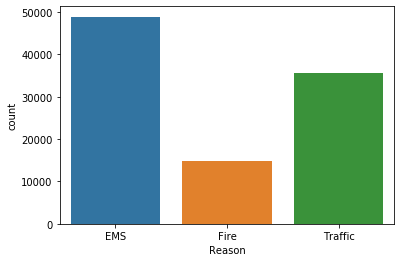

In [16]:
sns.countplot(df['Reason'])

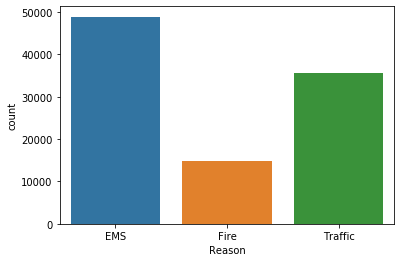

In [17]:
sns.countplot(x='Reason', data = df)

In [18]:
type('timeStamp')

str

In [19]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [20]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [21]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)

In [22]:
df['Month'] = df['timeStamp'].apply(lambda time: time.month)

In [23]:
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [24]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [25]:
dmap = {0:'Mon', 1:'Tue',3:'Wed', 4:'Thu', 5:'Fri',6:'Sat', 7:'Sun'}

In [26]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [27]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Wed
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Wed
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Wed
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Wed
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Wed


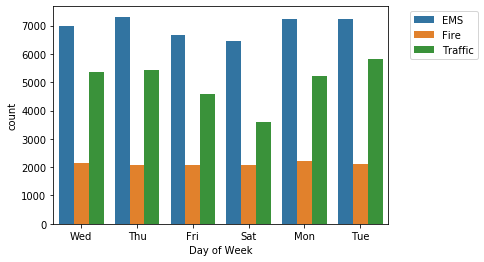

In [28]:
sns.countplot(x='Day of Week', data=df, hue='Reason')
plt.legend(bbox_to_anchor=(1.05,1))                     #legend outside

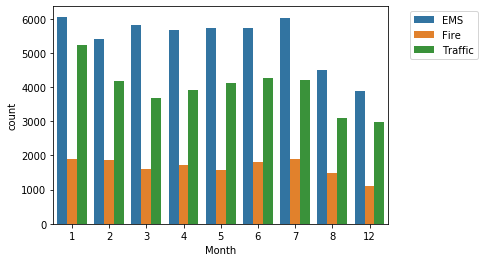

In [29]:
sns.countplot(x='Month', data = df, hue='Reason')
plt.legend(bbox_to_anchor=(1.05,1), loc=2)

In [30]:
byMonth = df.groupby('Month').count()    #used count() for aggregation.

In [31]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,11505
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,9564
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,9212
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,9809
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,9885


In [32]:
byMonth.reset_index('Month')

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,11505
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,9564
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,9212
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,9809
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,9885
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,9728
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,10420
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,7783
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,6707


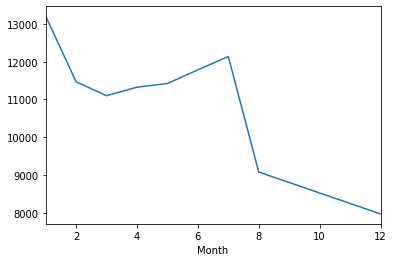

In [33]:
byMonth['lat'].plot()

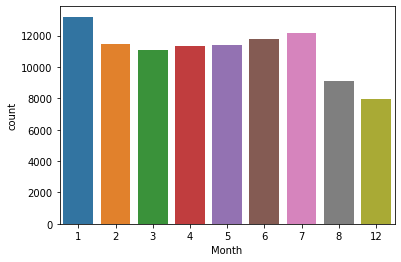

In [34]:
sns.countplot(x='Month', data=df)

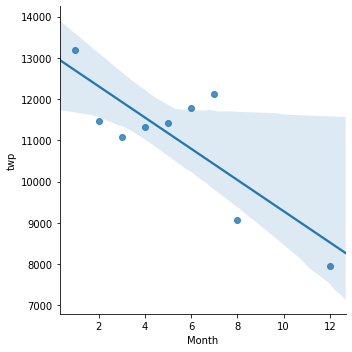

In [35]:
sns.lmplot(x='Month',y='twp', data=byMonth.reset_index(), palette='virish')

In [36]:
t = df['timeStamp'].iloc[1]

In [37]:
t.date()

datetime.date(2015, 12, 10)

In [38]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

In [39]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Wed,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Wed,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Wed,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Wed,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Wed,2015-12-10


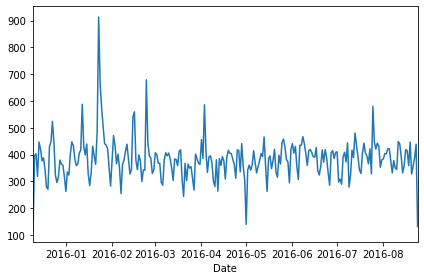

In [40]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

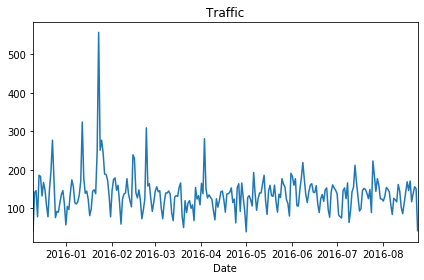

In [41]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

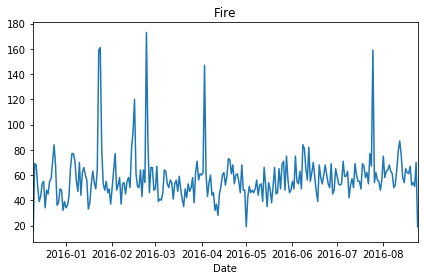

In [42]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

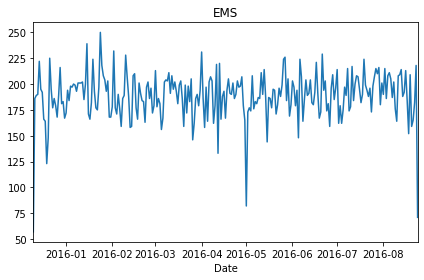

In [43]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

In [44]:
dayHour = df.groupby(['Day of Week', 'Hour']).count()['Reason'].unstack()

In [45]:
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


In [46]:
df.groupby(['Month','Date']).count()['Reason'].unstack()

Date,2015-12-10,2015-12-11,2015-12-12,2015-12-13,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-19,...,2016-08-15,2016-08-16,2016-08-17,2016-08-18,2016-08-19,2016-08-20,2016-08-21,2016-08-22,2016-08-23,2016-08-24
Month,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,360.0,419.0,415.0,359.0,447.0,328.0,357.0,389.0,439.0,132.0
12,115.0,396.0,403.0,319.0,447.0,421.0,377.0,388.0,346.0,279.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df.pivot_table(index='Day of Week', columns='Hour',values=df)['lat']

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,40.165790,40.165149,40.141154,40.148065,40.169937,40.177790,40.165542,40.162556,40.162658,40.170433,...,40.158426,40.160975,40.156457,40.153198,40.158696,40.160689,40.162264,40.164119,40.164187,40.165373
Mon,40.162162,40.161162,40.154063,40.174832,40.176374,40.175983,40.169440,40.160994,40.158522,40.160310,...,40.156284,40.156798,40.157361,40.155825,40.152469,40.153197,40.164290,40.157355,40.163505,40.159322
Sat,40.159093,40.155310,40.172051,40.159717,40.166284,40.159375,40.158364,40.158295,40.158953,40.165268,...,40.159051,40.166048,40.162271,40.167646,40.157766,40.157333,40.170696,40.162224,40.169060,40.164085
Thu,40.169621,40.157687,40.164340,40.160398,40.176780,40.174464,40.173802,40.156445,40.156771,40.161332,...,40.161011,40.151510,40.153237,40.156842,40.154495,40.155973,40.160767,40.162000,40.162012,40.166369
Tue,40.152128,40.153148,40.159789,40.165538,40.168159,40.161501,40.169410,40.164229,40.158545,40.154270,...,40.149995,40.154025,40.159972,40.157298,40.155406,40.160462,40.174660,40.168725,40.163557,40.162079
Wed,40.169482,40.163608,40.159372,40.171503,40.155952,40.161442,40.169035,40.157636,40.155030,40.148767,...,40.162824,40.152389,40.158809,40.164677,40.158404,40.162961,40.167278,40.163672,40.163334,40.155144


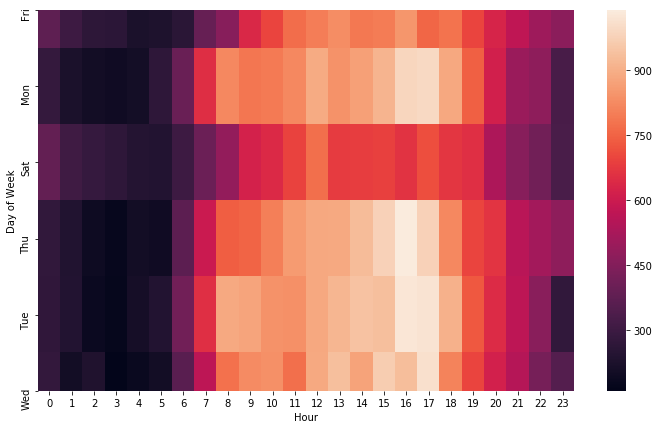

In [48]:
plt.figure(figsize=(12,7))
sns.heatmap(dayHour)

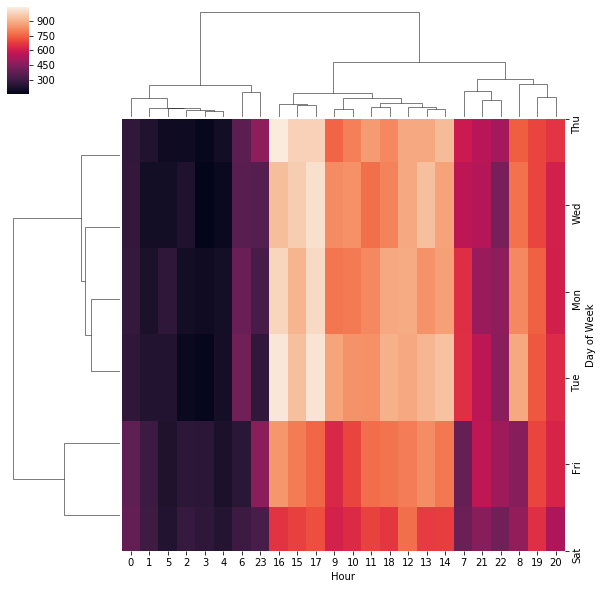

In [49]:
sns.clustermap(dayHour)

In [50]:
dayMonth = df.pivot_table(index='Day of Week', columns='Month')['lat']

dayMonth

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,40.163477,40.159981,40.157859,40.161857,40.162026,40.157370,40.162403,40.160300,40.164712
Mon,40.160669,40.159540,40.163434,40.154817,40.158249,40.157606,40.152441,40.155661,40.160774
Sat,40.166395,40.162071,40.161356,40.160816,40.161984,40.164407,40.160533,40.163153,40.161993
Thu,40.161439,40.158428,40.160825,40.158540,40.157945,40.154017,40.159495,40.154827,40.160551
Tue,40.166180,40.163650,40.156035,40.158453,40.158187,40.155161,40.160803,40.152565,40.158325
Wed,40.159112,40.157711,40.161705,40.157059,40.156176,40.154147,40.159432,40.156947,40.163191


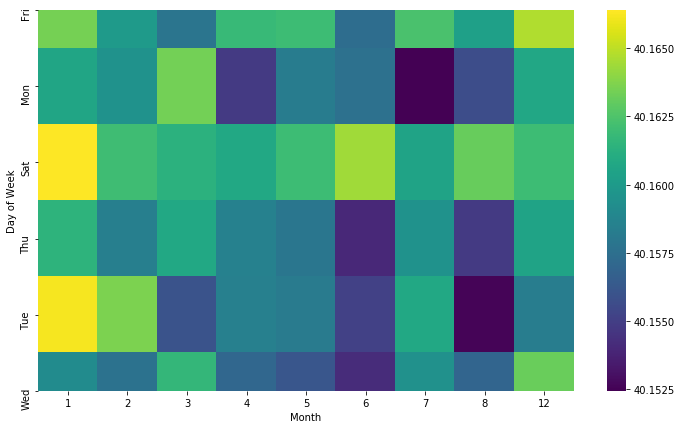

In [51]:
plt.figure(figsize=(12,7))
sns.heatmap(dayMonth, cmap='viridis')

<Figure size 864x504 with 0 Axes>

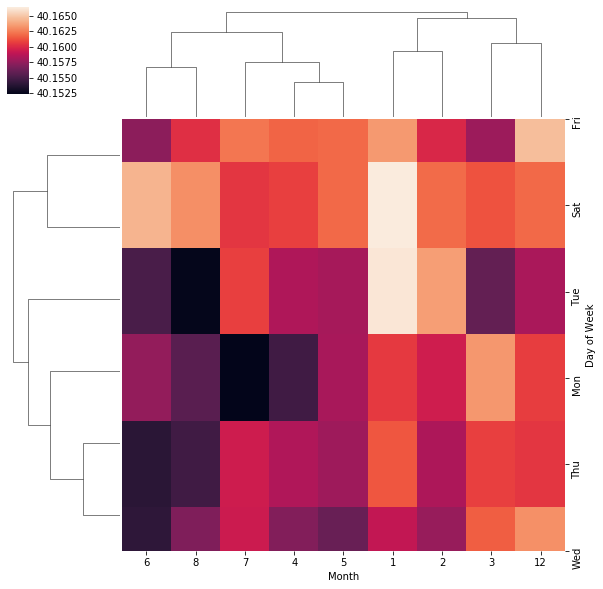

In [52]:
plt.figure(figsize=(12,7))
sns.clustermap(dayMonth)